In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('dataset.csv')

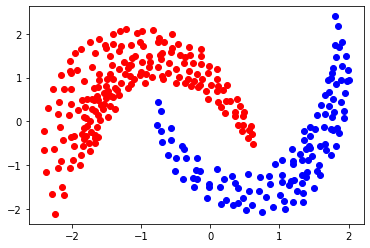

In [5]:
# Plotting the training dataset
vect = dataset.to_numpy()
plt.scatter(vect.T[0][vect.T[2]==0], vect.T[1][vect.T[2]==0], c = 'b', marker = 'o')
plt.scatter(vect.T[0][vect.T[2]==1], vect.T[1][vect.T[2]==1], c = 'r', marker = 'o')

In [30]:
Y = dataset[['y']].to_numpy()
X = dataset[['X_1', 'X_2']].to_numpy()

In [6]:
# GRADED FUNCTION: layer_sizes
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [7]:
# GRADED FUNCTION: initialize_parameters
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [8]:
def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [9]:
# GRADED FUNCTION: compute_cost
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    # Compute the cross-entropy cost
    logprobs = 1/m*(np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y))
    cost = - np.sum(logprobs) 
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    return cost

In [10]:
# GRADED FUNCTION: backward_propagation
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1, X.T)
    db1 = 1/m*np.sum(dZ1, axis = 1, keepdims = True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [11]:
# GRADED FUNCTION: update_parameters
def update_parameters(parameters, grads, learning_rate = 1.2):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [52]:
# GRADED FUNCTION: nn_model
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        # Print the cost every 1000 iterations
#         if print_cost and i % 100 == 0:
#             print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [13]:
# GRADED FUNCTION: predict
def predict(parameters, X):
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = sigmoid(A2)
    return predictions

In [24]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [37]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [54]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 2000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

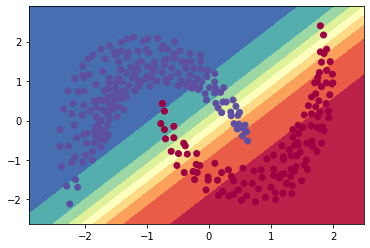

In [55]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 100, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

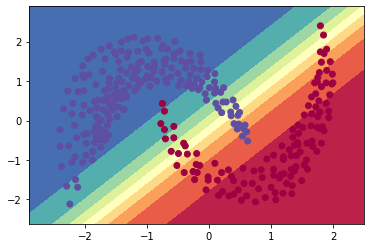

In [68]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 1000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

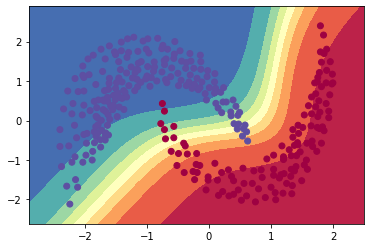

In [70]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 1400, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

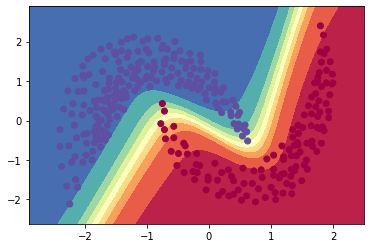

In [71]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 1500, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

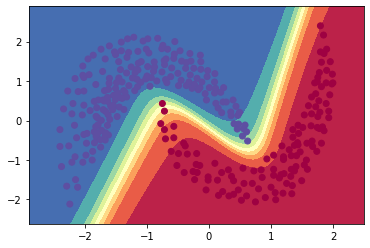

In [72]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 1600, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

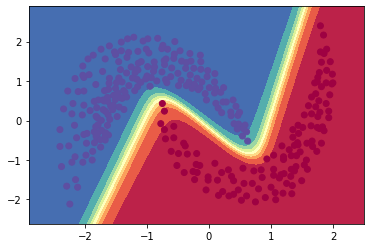

In [73]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 2000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

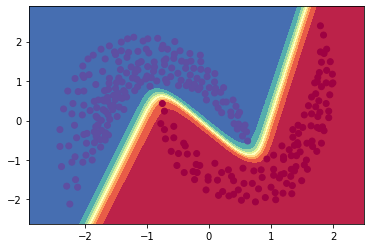

In [74]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 3000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

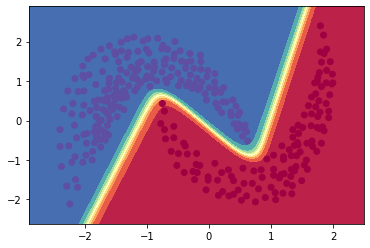

In [76]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 4000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

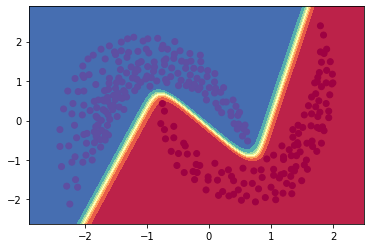

In [77]:
parameters = nn_model(X.T, Y.T, n_h = 4, num_iterations = 10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)